# Taller de Pandas
### Giovanny Alejandro Cuervo Londoño
---

Dataset: Beijing PM2.5 Data Data Set

<a href="https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data#"> Link
    
Fuente: Song Xi Chen, csx '@' gsm.pku.edu.cn, Guanghua School of Management, Center for Statistical Science, Peking University.


Info. Data set: The data time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as â€œNAâ€.


Información:

| Columna | Info |
| :------- | -----: |
| No | row number |
| year | year of data in this row |
| month | month of data in this row |
| day | day of data in this row |
| hour | hour of data in this row |
| pm2.5 | PM2.5 concentration (ug/m^3) |
| DEWP | Dew Point (â„ƒ) |
| TEMP | Temperature (â„ƒ) |
| PRES | Pressure (hPa) |
| cbwd | Combined wind direction |
| Iws | Cumulated wind speed (m/s) |
| Is | Cumulated hours of snow |
| Ir | Cumulated hours of rain |

Articulos relevantes:

> Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.



¿Como citar esta base de datos?:

> Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Caraga de Datos
---


In [17]:
ruta =  r"/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/3. Taller Pandas/PRSA_data_2010.1.1-2014.12.31.csv"

Data_set = pd.read_csv(ruta, sep = ',')

Data_set.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [18]:
print(f'Info: \n{Data_set.info()} \nShape: {Data_set.shape} ')
print(f'\n {Data_set.describe()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB
Info: 
None 
Shape: (43824, 13) 

                  No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
st

## Actividades 
---

1. Diga qué índices serían pertienentes tener y pongalos.

In [19]:
col_fechas = ['year', 'month', 'day', 'hour']
fecha = pd.to_datetime(Data_set[col_fechas]).dt.strftime('%Y/%m/%d %I%p')
fecha = pd.Series(fecha, name = 'date')
Data_set.set_index([Data_set['No'], fecha], inplace=True)
Data_set.drop(['No'], axis=1,  inplace=True)
Data_set.head()

,,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,date,,,,,,,,,,,,
1,2010/01/01 12AM,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010/01/01 01AM,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010/01/01 02AM,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010/01/01 03AM,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010/01/01 04AM,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


La variable `Data_set['No']` es necesario colocarla como índice del DataFrame, además se colocó la fecha `date` en formato %Y/%m/%d %I%p dado que sería pertinente a la hora de trabajarlo como una serie de tiempo.

2. Elimine registros que tengan NA en la columna "pm2.5"Data_set


In [20]:
#La unica varaible con datos nulos NA es pm2.5
Data_set.isna().sum() #eliminar datos NA equivale a eliminar 2067

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [21]:
Data_NoNA = Data_set.copy()

Data_NoNA = Data_NoNA.dropna()

print(f'Info: \n{Data_NoNA.isna().sum()} \nShape: {Data_NoNA.shape}')

print(f'\nfilas Antes: {Data_set.shape[0]} y filas Depues: {Data_NoNA.shape[0]} \nFilas Eliminadas: {Data_set.shape[0]-Data_NoNA.shape[0]}')



Info: 
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64 
Shape: (41757, 12)

filas Antes: 43824 y filas Depues: 41757 
Filas Eliminadas: 2067


3. Relice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

In [22]:
years = Data_NoNA['year'].unique()
Columns = Data_NoNA.select_dtypes(include=np.number).columns[5:].tolist()

print(f'Años: {years} \nColumnas numéricas: {Columns}')

Por_año = {}

for i in years:
    Por_año[i] = Data_NoNA[Data_NoNA['year'] == i].select_dtypes(include=np.number)  

#Describe
print(f'\nAño 2010: \n{Por_año[2010].iloc[:, 5:].describe()} \n \nAño 2011: \n{Por_año[2011].iloc[:, 5:].describe()}')
print(f'\nAño 2012: \n{Por_año[2012].iloc[:, 5:].describe()}\n \nAño 2013: \n{Por_año[2013].iloc[:, 5:].describe()}')
print(f'\nAño 2014: \n{Por_año[2014].iloc[:, 5:].describe()}')

Años: [2010 2011 2012 2013 2014] 
Columnas numéricas: ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

Año 2010: 
              DEWP         TEMP         PRES          Iws           Is  \
count  8091.000000  8091.000000  8091.000000  8091.000000  8091.000000   
mean      1.352120    11.313805  1016.291373    29.214860     0.077123   
std      14.584996    12.684701     9.797649    56.150098     1.019457   
min     -28.000000   -19.000000   994.000000     0.450000     0.000000   
25%     -11.000000     0.000000  1009.000000     1.790000     0.000000   
50%       1.000000    11.000000  1015.000000     7.140000     0.000000   
75%      15.000000    23.000000  1023.000000    27.720000     0.000000   
max      28.000000    41.000000  1043.000000   565.490000    27.000000   

                Ir  
count  8091.000000  
mean      0.269312  
std       1.836257  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      36.000000   
 
Año 2011: 
              DEWP  

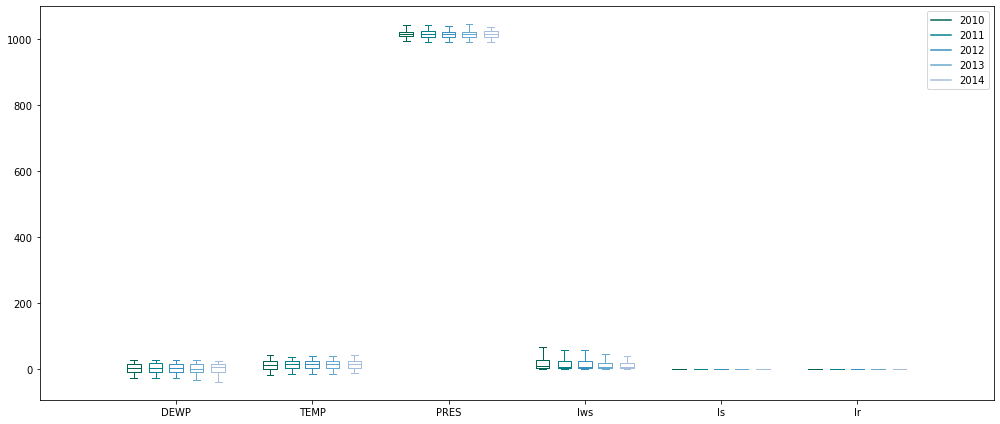

In [23]:
#Boxplot
plt.figure(figsize=(14,6))
bp2010 = plt.boxplot(Por_año[2010].iloc[:, 5:], labels=Columns, positions=np.array(range(len(Columns)))*2.0-0.62,sym='', widths=0.2)
bp2011 = plt.boxplot(Por_año[2011].iloc[:, 5:], labels=Columns, positions=np.array(range(len(Columns)))*2.0-0.3, sym='', widths=0.2)
bp2012 = plt.boxplot(Por_año[2012].iloc[:, 5:], labels=Columns, positions=np.array(range(len(Columns)))*2.0+0, sym='', widths=0.2)
bp2013 = plt.boxplot(Por_año[2013].iloc[:, 5:], labels=Columns, positions=np.array(range(len(Columns)))*2.0+0.3, sym='', widths=0.2)
bp2014 = plt.boxplot(Por_año[2014].iloc[:, 5:], labels=Columns, positions=np.array(range(len(Columns)))*2.0+0.62, sym='', widths=0.2)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

c10, c11, c12, c13, c14 = '#016450', '#02818a', '#3690c0', '#67a9cf', '#a6bddb'
set_box_color(bp2010, c10)
set_box_color(bp2011, c11)
set_box_color(bp2012, c12)
set_box_color(bp2013, c13)
set_box_color(bp2014, c14)

plt.plot([], c= c10, label='2010')
plt.plot([], c= c11, label='2011')
plt.plot([], c= c12, label='2012')
plt.plot([], c= c13, label='2013')
plt.plot([], c= c14, label='2014')
plt.legend()

plt.xticks(range(0, len(Columns) * 2, 2), Columns)
plt.xlim(-2, len(Columns)*2)

plt.tight_layout()

Nuvos puntos del taller

4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

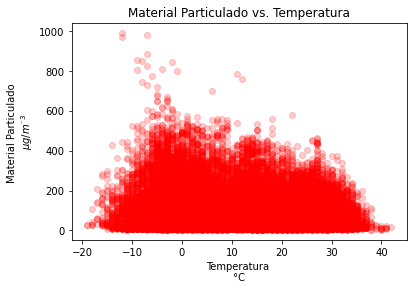

In [24]:
#plt.scatter(Data_NoNA['pm2.5'], Data_NoNA['TEMP'], c='r', alpha=0.2)
plt.scatter( Data_NoNA['TEMP'], Data_NoNA['pm2.5'], c='r', alpha=0.2)
plt.title('Material Particulado vs. Temperatura')
plt.xlabel('Temperatura \n°C')
plt.ylabel('Material Particulado \n$\mu g/m^{⁻3}$');


El material particulado parece tener algun grado de correlación con la temeperatura, sin hacer ninguna regresión lineal, esposible ver una relación inversa donde mayor temperatura se observa una menor cantidad de material particulado, ademas también es posible observar una mayor varaibilidad de los datos de Material particulado hacia menores valores de temperatura

5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120



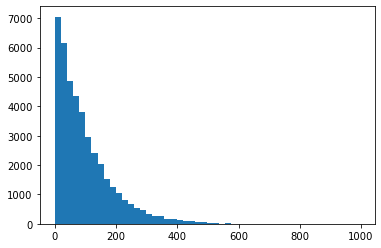

In [31]:
plt.hist(Data_NoNA['pm2.5'], bins=50);

Se realiza una prueba de Bondad de Ajuste para conocer la Función de Distribución de probabilidad que mejor se ajusta a los datos; por lo que se usó "Reduced Chi-square Statistic"

In [26]:
#TOMADO DE: https://github.com/samread81/Distribution-Fitting-Used_Car_Dataset/blob/master/Workbook.ipynb
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler

def standarise(column,pct,pct_lower):
    df = Data_NoNA #######AQUI COLOCA EL NOMBRE DEL DATAFRAME#######
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [27]:
fit_distribution('pm2.5',0.99,0.01);

(1.0220932187761087, -1.0801333393398687, 1.0895950002741848)

(0.0, 1.0)

(185781562.16473442, 126165272.52069297, 126165272.94775501)



/home/mofoko/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.8507665079696258, 4.2836655283398635, -1.0800781836884887, 6.702020872170255)

(0.9812201779213847, -1.2375274577590667, 1.261213747390637)

(-1.0800781836884885, 4.994348569788795)

(1.0110852773611025, -1.0801042572127284, 1.0682785304514035)

(-1.0800781836884885, 1.0800781836884885)

(0.9885566161420596, -1.151987347794911, 0.7580042652699854)

(1.9889884427495785, -3.9730053585784546e-05, 1.0741182078732643)

(0.003760950912621198, -1.086830734421064, 5.003039361742928)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
3          beta       119.0
7         expon       229.0
6         gamma       239.0
9      pearson3       239.0
0   weibull_min       270.0
8       lognorm      1537.0
4      invgauss      1606.0
2   weibull_max     12326.0
10       triang     23797.0
1          norm     32513.0
5       uniform     69652.0


Por lo que la mejor Distribución de Probabilidad es: Beta
para hallar los parámetros $\alpha$ y $\beta$

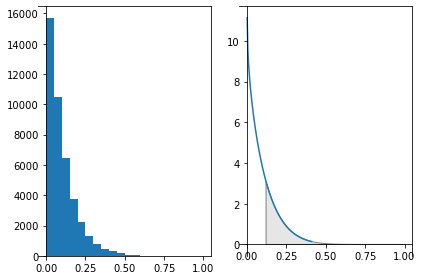

la probabilidad de un valor mayor a 120 es: 0.3100382411945549


In [28]:
from scipy.stats import beta
from sklearn import preprocessing
from scipy import integrate
from matplotlib.patches import Polygon

data2array = np.array(Data_NoNA['pm2.5'])
#norm_arr = preprocessing.normalize([data2array])
norm_arr=[]
for i in Data_NoNA['pm2.5']:
    n = (i-np.min(data2array))/(np.max(data2array)-np.min(data2array))
    norm_arr.append(n)
    

n_120=(120-np.min(data2array))/(np.max(data2array)-np.min(data2array))


μ = np.mean(norm_arr)
σ = np.std(norm_arr)
α = (((1-μ)/(σ**2))-(1/μ))*(μ**2)
β = α*((1/μ)-1)
mean, var = beta.stats(α, β, moments='mv')

x = np.linspace(beta.ppf(0.01, α, β),
                beta.ppf(0.99, α, β), 100)


fig, axs = plt.subplots(1,2)
a1, b1 = n_120, np.max(norm_arr)
ix1 = np.linspace(a1, b1)
iy1 = scipy.stats.beta.pdf(ix1, α, β)
verts1 = [(a1, 0), *zip(ix1, iy1), (b1, 0)]
poly1 = Polygon(verts1, facecolor='0.9', edgecolor='0.5')
axs[1].add_patch(poly1)

axs[0].hist(pd.DataFrame(norm_arr), bins=20)
axs[0].spines['left'].set_position('zero')

axs[1].plot(x, beta.pdf(x, α, β))
axs[1].spines['left'].set_position('zero')
axs[1].spines['bottom'].set_position('zero')
fig.tight_layout();
plt.show()

beta = lambda x: scipy.stats.beta.pdf(x, α, β)

I_1, err_1 = integrate.quad(beta, n_120, np.inf)


print(f'la probabilidad de un valor mayor a 120 es: {I_1}')


6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

In [29]:
Data_numeric = Data_NoNA.select_dtypes(include=np.number)
Data_group = Data_numeric.groupby('year').mean()

print(Data_group['pm2.5'].sort_values(ascending=True))

year
2012     90.545871
2014     97.734557
2011     99.071340
2013    101.712376
2010    104.045730
Name: pm2.5, dtype: float64


## Bibliografía
---
> https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802